In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
dataset.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [6]:
dataset['Close'] = dataset['Close'].str.replace(',', '').astype(float)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset['Close'].values.reshape(-1,1))

In [8]:
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [9]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

In [10]:
split_ratio = 0.8
split_index = int(split_ratio * len(dataset))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
32/32 [==============================] - 23s 249ms/step - loss: 0.0263
Epoch 2/5
32/32 [==============================] - 8s 244ms/step - loss: 0.0105
Epoch 3/5
32/32 [==============================] - 8s 246ms/step - loss: 0.0090
Epoch 4/5
32/32 [==============================] - 8s 247ms/step - loss: 0.0075
Epoch 5/5
32/32 [==============================] - 8s 243ms/step - loss: 0.0066


In [15]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

5/5 [==============================] - 4s 76ms/step - loss: 6.2165e-04
Test Loss: 0.0006216487963683903


In [16]:
predictions = model.predict(X_test)

5/5 [==============================] - 3s 73ms/step


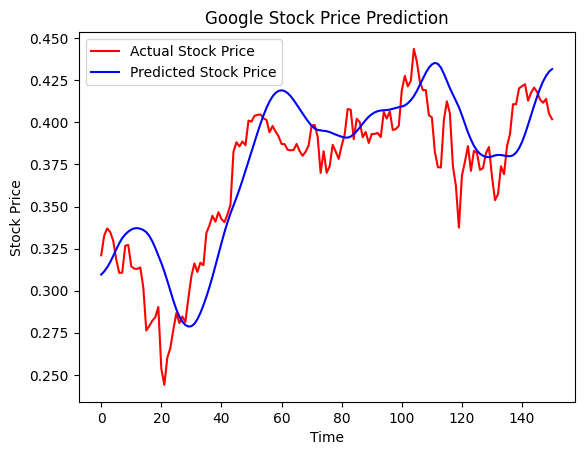

In [17]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  0.024932883734427178
